# Dataset Details - Stanford Dogs Dataset

This EDA aims to provide a comprehensive overview of the dog images dataset, focusing on dataset characteristics, image properties, and label distribution. Understanding these aspects is crucial for building an effective image classification model.

Look for the model card in [here](/docs/Dataset_card.md)

In [34]:
import os
import pandas as pd
from PIL import Image
import plotly.express as px

In [35]:
RAW_DATA = '../data/raw/'
RAW_TRAIN_DATA = '../data/raw/train/'
RAW_TEST_DATA = '../data/raw/test/'

## Dataset Overview

In [36]:
# Helper function to get size in MB
def get_size_in_mb(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            total_size += os.path.getsize(file_path)
    return total_size / (1024 * 1024)  # Convert to MB

# Helper function to get image details
def get_image_details(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        mode = img.mode
        img_format = img.format
    return width, height, mode, img_format

In [37]:
# Dataset-related EDA
def dataset_info():
    train_size_mb = get_size_in_mb(RAW_TRAIN_DATA)
    test_size_mb = get_size_in_mb(RAW_TEST_DATA)

    num_train_images = sum([len(files) for r, d, files in os.walk(RAW_TRAIN_DATA)])
    num_test_images = sum([len(files) for r, d, files in os.walk(RAW_TEST_DATA)])

    train_test_split = f"{num_train_images / (num_train_images + num_test_images) * 100:.2f}% Train - {num_test_images / (num_train_images + num_test_images) * 100:.2f}% Test"

    print(f"Train Data Size: {train_size_mb:.2f} MB")
    print(f"Test Data Size: {test_size_mb:.2f} MB")
    print(f"Total Train Images: {num_train_images}")
    print(f"Total Test Images: {num_test_images}")
    print(f"Data Split from Total Images: {train_test_split}")

dataset_info()

Train Data Size: 344.94 MB
Test Data Size: 346.23 MB
Total Train Images: 10222
Total Test Images: 10357
Data Split from Total Images: 49.67% Train - 50.33% Test


In [38]:
# Image-related EDA
def image_info():
    image_data = []
    for dirpath, _, filenames in os.walk(RAW_TRAIN_DATA):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            width, height, mode, img_format = get_image_details(file_path)
            image_data.append([file_path, width, height, mode, img_format])

    df_images = pd.DataFrame(image_data, columns=['Path', 'Width', 'Height', 'Mode', 'Format'])
    
    print(f"\nImage Info (Train Dataset):")
    print(f"Average Resolution: {df_images[['Width', 'Height']].mean().values}")
    print(f"Image Format Distribution: {df_images['Format'].value_counts()}")
    print(f"Image Mode (Channels) Distribution: {df_images['Mode'].value_counts()}")

image_info()


Image Info (Train Dataset):
Average Resolution: [443.33153982 386.7472119 ]
Image Format Distribution: JPEG    10222
Name: Format, dtype: int64
Image Mode (Channels) Distribution: RGB    10222
Name: Mode, dtype: int64


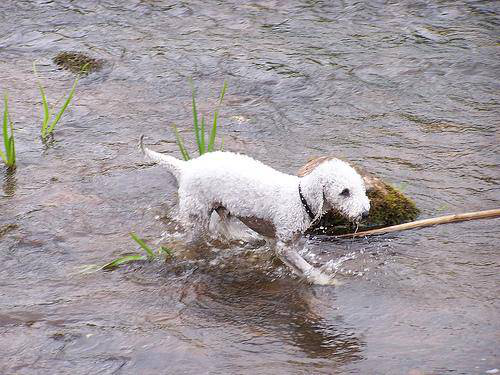

In [39]:
files = os.listdir(RAW_TRAIN_DATA)
files = [RAW_TRAIN_DATA + f for f in files]

Image.open(files[5])

In [40]:
labels_path = RAW_DATA + 'labels.csv'
labels_df = pd.read_csv(labels_path)

# 1. Number of Classes (Breeds)
num_classes = labels_df['breed'].nunique()
print(f"Total number of classes (breeds): {num_classes}")

class_distribution = labels_df['breed'].value_counts()

Total number of classes (breeds): 120


In [41]:
# 3. Most and Least Frequent Classes
most_frequent = class_distribution.head(10)
least_frequent = class_distribution.tail(10)

print("\nMost Frequent Breeds (Top 10):")
print(most_frequent)

print("\nLeast Frequent Breeds (Bottom 10):")
print(least_frequent)


Most Frequent Breeds (Top 10):
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: breed, dtype: int64

Least Frequent Breeds (Bottom 10):
otterhound           69
german_shepherd      69
walker_hound         69
tibetan_mastiff      69
giant_schnauzer      69
golden_retriever     67
brabancon_griffon    67
komondor             67
eskimo_dog           66
briard               66
Name: breed, dtype: int64


In [42]:
fig = px.bar(
    class_distribution,
    x=class_distribution.index,
    y=class_distribution.values,
    labels={'x': 'Breed', 'y': 'Number of Images'},
    title='Class Distribution of Dog Breeds',
    hover_name=class_distribution.index,
)

# Update the layout for better readability
fig.update_layout(
    xaxis_title="Dog Breeds",
    yaxis_title="Number of Images",
    xaxis_tickangle=-45,
    showlegend=False,
    height=600,
    width=1000
)

# Show the figure
fig.show()

## Analysis of the Dataset Distribution

1. **Number of Classes**
- There are **120 dog breeds** (classes) in total, which provides a good variety for classification.

2. **Most Frequent Breeds (Top 10)**
- The most frequent breeds range from **126 to 109 images**.
- The Scottish Deerhound has the highest representation with **126 images**, followed by breeds like Maltese Dog, Afghan Hound, and Entlebucher.
- These top breeds have more samples, which can positively influence the model's ability to classify them accurately. The more images per class, the better a model can generalize.

3. **Least Frequent Breeds (Bottom 10)**
- The least frequent breeds have between **69 and 66 images**, such as Otterhound, German Shepherd, and Golden Retriever.
- With fewer images per breed, the model might struggle to classify these breeds, as fewer samples mean less variability for the model to learn from. The model may either underfit or have difficulty generalizing for these underrepresented classes.

4. **Range of Distribution**
- The difference between the most frequent breed (126 images) and the least frequent breed (66 images) is **60 images**. This shows a noticeable imbalance, but it is not extreme.
- The dataset is skewed, but the variation is somewhat moderate (not excessively disproportionate like some other datasets that might have hundreds of images for one class and only a few for others).

## Conclusion

- **Moderate Class Imbalance**: While there is an imbalance in the number of images per class, it is not drastic. However, the lower end (66-69 images) might require special attention during model training.
  
- **Impact on Model Performance**: Classes with more images (such as the top 10 breeds) will likely be easier for the model to classify, while underrepresented classes (bottom 10 breeds) might suffer from underfitting or lower accuracy.

## Recommendations

1. **Data Augmentation for Minor Classes**: Consider applying augmentation techniques (e.g., rotations, flips, zooms) to increase the variability of the underrepresented breeds.
2. **Class Weights**: During training, you can assign class weights to penalize errors in underrepresented classes more heavily, balancing the model’s focus across all breeds.
3. **Stratified Sampling**: When splitting data for training and testing, ensure stratified sampling to maintain class proportions in both sets, preventing further imbalance.

By balancing these classes and applying the right preprocessing, you can mitigate the challenges posed by class imbalance and improve the model's overall performance.